# Data Cleaning  of emissions and land dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('Carbon Dioxide Emission Estimates.csv')
dfl=pd.read_csv('Land.csv')


# Finding Matching Years in Two Datasets

I have two datasets—one containing information on emissions and the other on land use—spanning across the globe. However, I aim to narrow my focus specifically to South America. To achieve this, I need to utilize the data points that are common to both datasets, ensuring they share the same year and countries with available information in both sets.

In [63]:
# Extracting the years from the datasets
years_e = df['Year'].unique()
years_l = dfl['Year'].unique()

# Finding the years that are present in both datasets
coinciding_years = np.intersect1d(years_e, years_l)

# Filtering the datasets only with the years that are in both datasets
dfemi = df[(df['Year'].isin(coinciding_years))]
dfland = dfl[(dfl['Year'].isin(coinciding_years))]

# Renaming the columns
dfemi.columns = ['Country', 'Year', 'Type', 'Value']
dfland.columns = ['Country', 'Year', 'Type', 'Value']
dfemi['Year']=dfemi['Year'].astype(str)
dfland['Year']=dfland['Year'].astype(str)

#OTRA MANERA
#AñosE = set(df['Year'].unique())
#AñosL = set(dfl['Year'].unique())
#años_coincidentes = list(AñosE.intersection(AñosL))
#print(años_coincidentes)
#Este código utiliza set() para convertir los arrays de años únicos en conjuntos y luego aplica la función intersection() para encontrar la intersección de los conjuntos, es decir, los años que son comunes en ambos DataFrames. La lista resultante, años_coincidentes, contendrá esos años.
#DFETCO2 = df[(df['Year'].isin(años_coincidentes))]
#DFLand=dfl[(dfl['Year'].isin(años_coincidentes))]

C:\Users\mateo\AppData\Local\Temp\ipykernel_22336\290749340.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfland['Year']=dfland['Year'].astype(str)


# Filtering South American Countries


## Filtering Countries Present in Both Datasets

In order to use the data, is important to use the countrys that are in both datasets.

In [14]:

# Extracting the countries from the dataset
countries_l = dfland['Country'].unique()
countries_e = dfemi['Country'].unique()

# Due to the nature of the dataset and the country names, it is necessary (only for South America) to extract the first words of each country
countries_l = [(country.split(' ')[0]) for country in countries_l]
countries_e = [(country.split(' ')[0]) for country in countries_e]

# Writing a list with the countries of South America
south_american_countries = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela",
    "Trinidad"
]

# Finding the intersection of South American countries that are in both dataframes
coincident_countries = np.intersect1d(countries_e, countries_l)
coincident_south_american_countries = np.intersect1d(coincident_countries, south_american_countries)
coincident_south_american_countries



array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Paraguay', 'Peru', 'Suriname', 'Trinidad', 'Uruguay', 'Venezuela'],
      dtype='<U13')

## Finalizing the Land Dataframe

In [15]:
dfland = dfland.copy()  # This is done to explicitly work on a copy of the data and not a view of the original dataframe
# Add another column with the first words of each country
dfland['Country_processed'] = dfland['Country'].apply(lambda x: x.split()[0])#lambda x is equivalent to: [country.split()[0] for country in countries]
df_countries_years = dfland[dfland['Country_processed'].isin(coincident_south_american_countries)]
# If I want to convert everything to lowercase, I use .str.lower.
df_countries_years = df_countries_years.drop(columns=['Country_processed'])
print(df_countries_years['Country'].unique())

['Argentina' 'Bolivia (Plurin. State of)' 'Brazil' 'Chile' 'Colombia'
 'Ecuador' 'Paraguay' 'Peru' 'Suriname' 'Trinidad and Tobago' 'Uruguay'
 'Venezuela (Boliv. Rep. of)']


In [16]:

df_countries_years.head()


,Country,Year,Type,Value
864,Argentina,2005,Land area (thousand hectares),273669.0000
865,Argentina,2005,Arable land (thousand hectares),32897.5000
866,Argentina,2005,Permanent crops (thousand hectares),1000.0000
867,Argentina,2005,Forest cover (thousand hectares),30186.0000
868,Argentina,2005,Arable land (% of total land area),12.0209


## Finalizing the Emissions dataframe

In [17]:
dfemi = dfemi.copy()
dfemi['Country_processed'] = dfemi['Country'].apply(lambda x: x.split()[0])
df_countries_years_e = dfemi[dfemi['Country_processed'].isin(coincident_south_american_countries)]
df_countries_years_e = df_countries_years_e.drop(columns=['Country_processed'])
df_countries_years_e['Country'].unique()

array(['Argentina', 'Bolivia (Plurin. State of)', 'Brazil', 'Chile',
       'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Suriname',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela (Boliv. Rep. of)'],
      dtype=object)

# Splitting Dataframes by Data Type

The database structure comprises two columns containing all the information. To effectively utilize this data for visualization in Power BI, I need to split the dataframes by datatype. This separation will facilitate the creation of distinct sheets in Excel or tables in SQL, streamlining the process of data visualization in Power BI.

In [65]:
# Divide dataframes by type
# Emissions
percapitae = df_countries_years_e[df_countries_years_e['Type'] == 'Emissions per capita (metric tons of carbon dioxide)']
datae_b = df_countries_years_e[df_countries_years_e['Type'] == 'Emissions (thousand metric tons of carbon dioxide)']
# Land
datal_a = df_countries_years[df_countries_years['Type'] == 'Land area (thousand hectares)']
datal_b = df_countries_years[df_countries_years['Type'] == 'Permanent crops (thousand hectares)']
datal_c = df_countries_years[df_countries_years['Type'] == 'Forest cover (thousand hectares)']
datal_d = df_countries_years[df_countries_years['Type'] == 'Arable land (thousand hectares)']


# Writing Data to Excel Sheets

In [19]:
Years = pd.DataFrame(df_countries_years['Year'].unique())
Years.columns = ['Year']
Countries = pd.DataFrame(df_countries_years['Country'].unique())
Countries.columns = ['Country']

with pd.ExcelWriter('Dataclean.xlsx') as writer:
    percapitae.to_excel(writer, sheet_name='Emissions per capita', index=False)
    datae_b.to_excel(writer, sheet_name='Emissions', index=False)
    datal_a.to_excel(writer, sheet_name='Land area', index=False)
    datal_b.to_excel(writer, sheet_name='Permanent crops', index=False)
    datal_c.to_excel(writer, sheet_name='Forest cover', index=False)
    datal_d.to_excel(writer, sheet_name='Arable land', index=False)
    Years.to_excel(writer, sheet_name='Years', index=False)
    Countries.to_excel(writer, sheet_name='Countries', index=False)


## Writing Data to SQL Database

In [20]:
import sqlite3
import pandas as pd

# Database Connection(This connection allow me to interact with the database)

conn = sqlite3.connect('dataclean.db')

# Function to write DataFrame to SQL table
def write_dataframe_to_sql(dataframe, table_name, connection):
    dataframe.to_sql(table_name, connection, if_exists='replace', index=False)

# Write each DataFrame to a SQL table
write_dataframe_to_sql(percapita, 'Emissions per capita', conn)
write_dataframe_to_sql(datae_b, 'Emissions', conn)
write_dataframe_to_sql(datal_a, 'Land area', conn)
write_dataframe_to_sql(datal_b, 'Permanent crops', conn)
write_dataframe_to_sql(datal_c, 'Forest cover', conn)
write_dataframe_to_sql(datal_d, 'Arable land', conn)
write_dataframe_to_sql(Years, 'Years', conn)
write_dataframe_to_sql(Countries, 'Countries', conn)

# Commit the changes and close the connection
conn.commit()
conn.close()


# Seaborn

I want to create an initial visualization using Seaborn before transitioning to Power BI. Specifically, I'll be exploring emissions per capita data. Preliminary analysis suggests that Trinidad and Tobago exhibit the highest emissions per capita

In [56]:
#This line of code performs several operations on the DataFrame datae_a:

#datae_a[['Country','Value']]: This part selects only the columns 'Country' and 'Value' from the DataFrame datae_a.

#.groupby('Country'): This part groups the DataFrame by the values in the 'Country' column. It creates a group for each unique value in the 'Country' column.

#.sum(): This part calculates the sum of the numerical values within each group. Since we are only interested in the 'Value' column, it sums the values within each group of countries.it's important to clarify that the .sum() function will operate on the numerical columns by default, summing up all the numerical values within each group.

#.reset_index(): This part resets the index of the resulting DataFrame. After performing the groupby operation and the sum aggregation, the DataFrame will have a hierarchical index with 'Country' as the outer index level. Calling reset_index() moves 'Country' back to a regular column and resets the index to a default integer index.

C:\Users\mateo\AppData\Local\Temp\ipykernel_22336\4035878312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percapitae['Year'] = percapitae['Year'].astype(str)
C:\Users\mateo\AppData\Local\Temp\ipykernel_22336\4035878312.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country',y='Value',hue='Year', ci=None,palette="deep", data=percapita,order=None)


<Axes: xlabel='Country', ylabel='Value'>

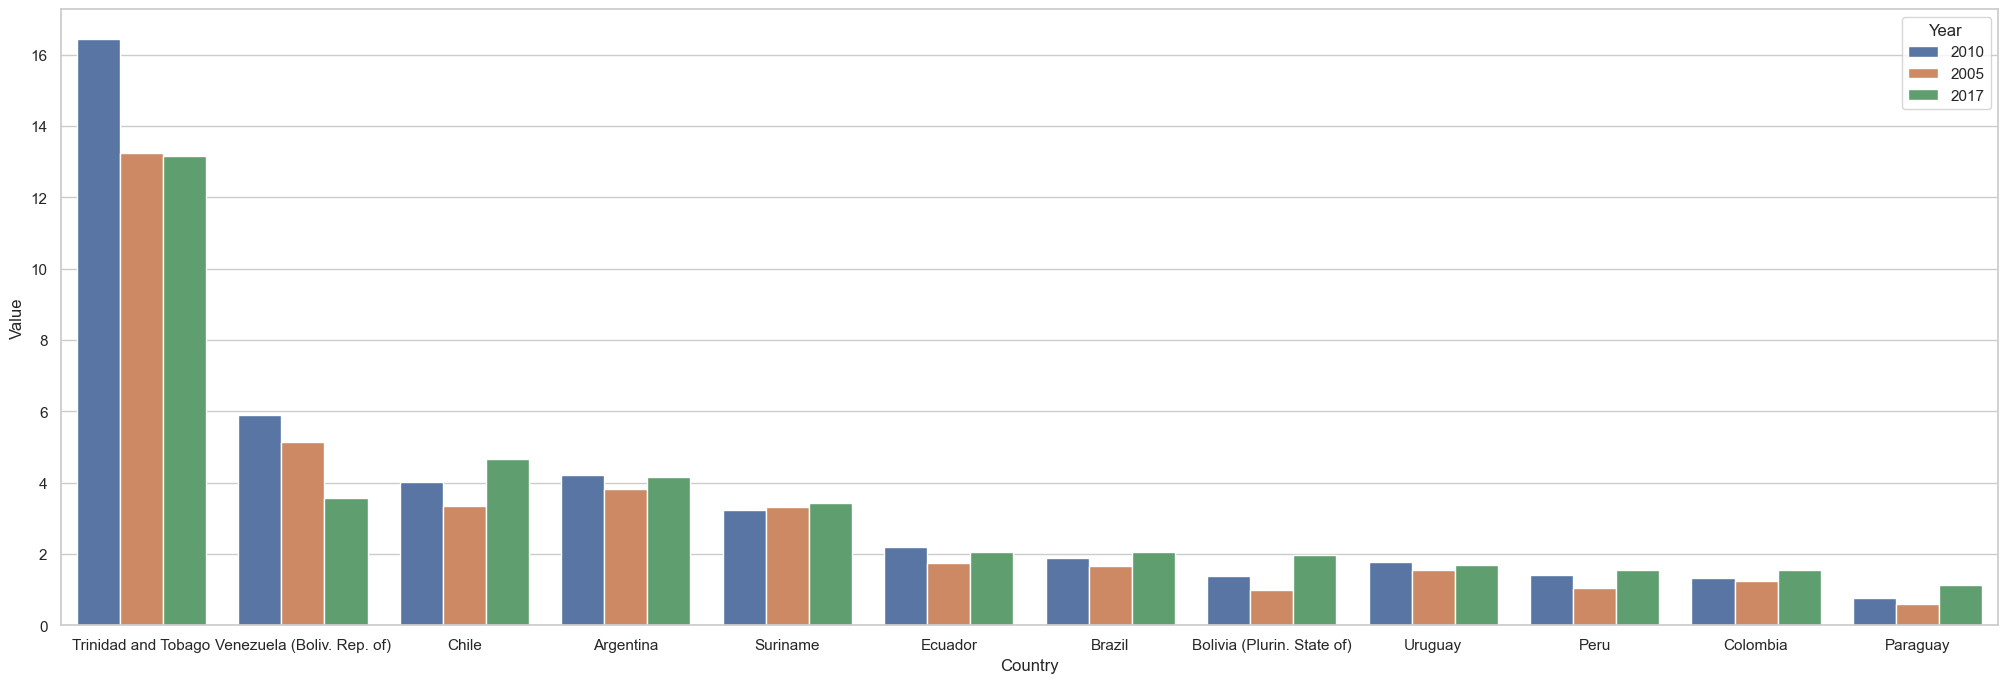

In [66]:
plt.figure(figsize=(25, 8))
percapitae['Year'] = percapitae['Year'].astype(str)
percapita=percapitae.sort_values(by='Value',ascending=False)
sns.barplot(x='Country',y='Value',hue='Year', ci=None,palette="deep", data=percapita,order=None)


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Emission Per Capita')

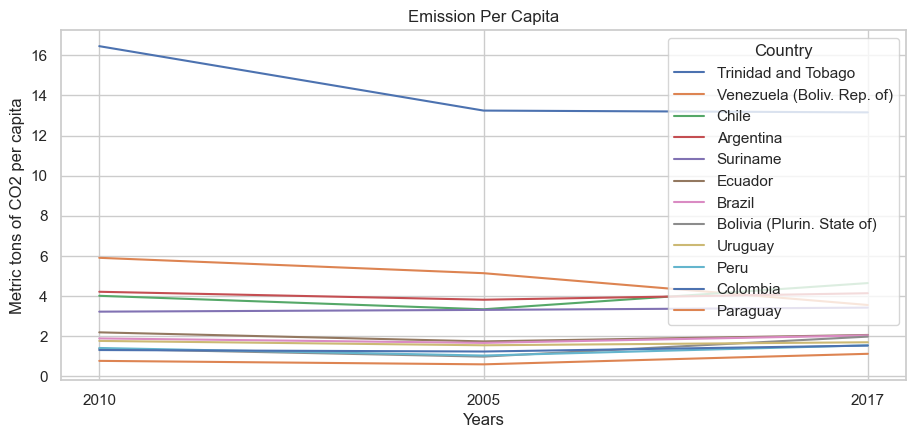

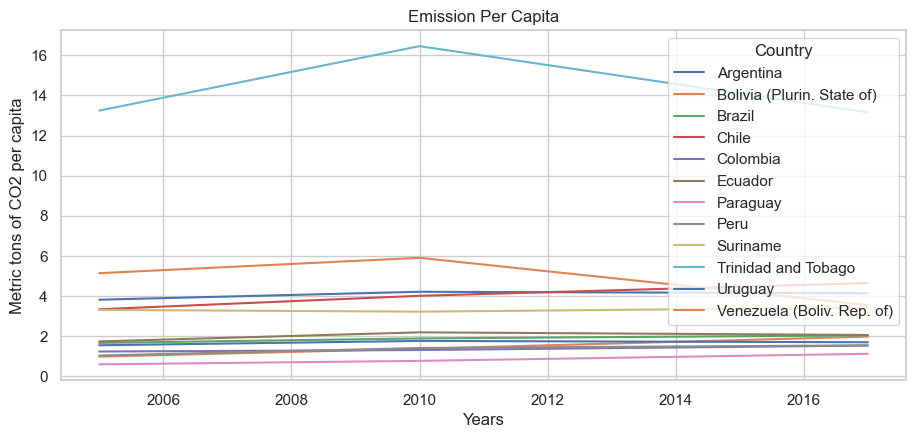

In [60]:
#Emissions per capita
plt.figure(figsize=(24, 10))
plt.subplot(2,2,1)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=percapita)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2 per capita")
gea.set_title("Emission Per Capita")
plt.figure(figsize=(24, 10))
plt.subplot(2,2,2)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datae_a)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2 per capita")
gea.set_title("Emission Per Capita")

C:\Users\mateo\AppData\Local\Temp\ipykernel_22336\4241090453.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=p,order=None)
C:\Users\mateo\AppData\Local\Temp\ipykernel_22336\4241090453.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=datasorted1,order=None)


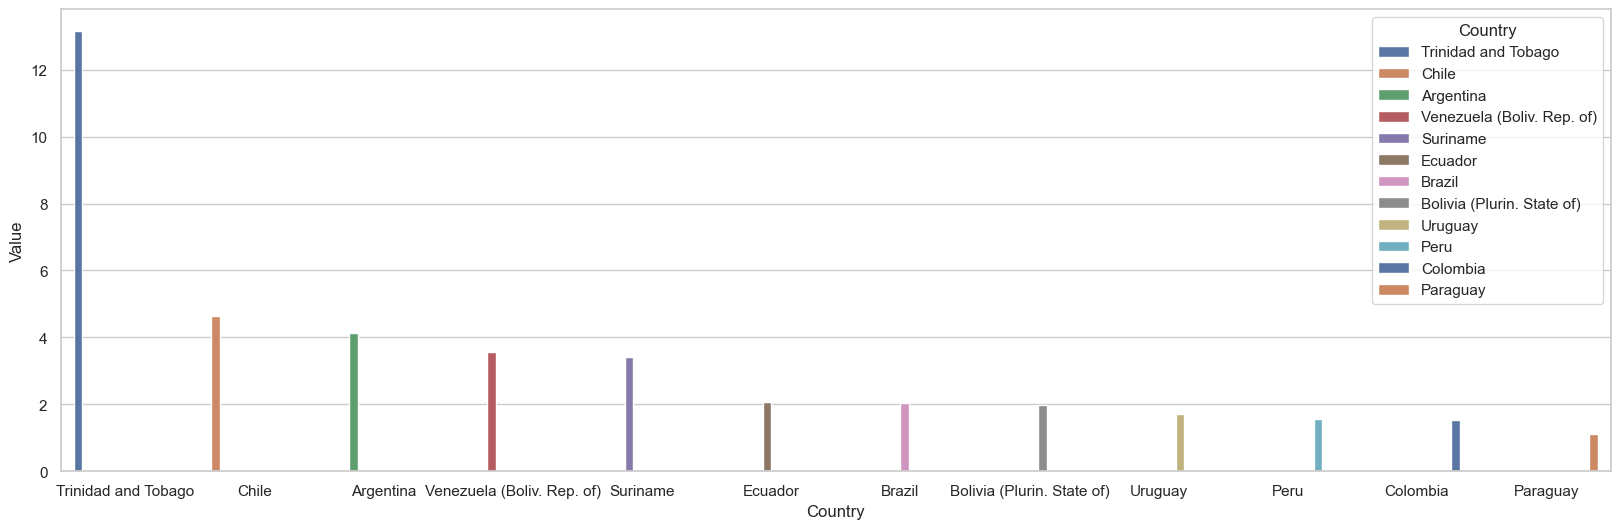

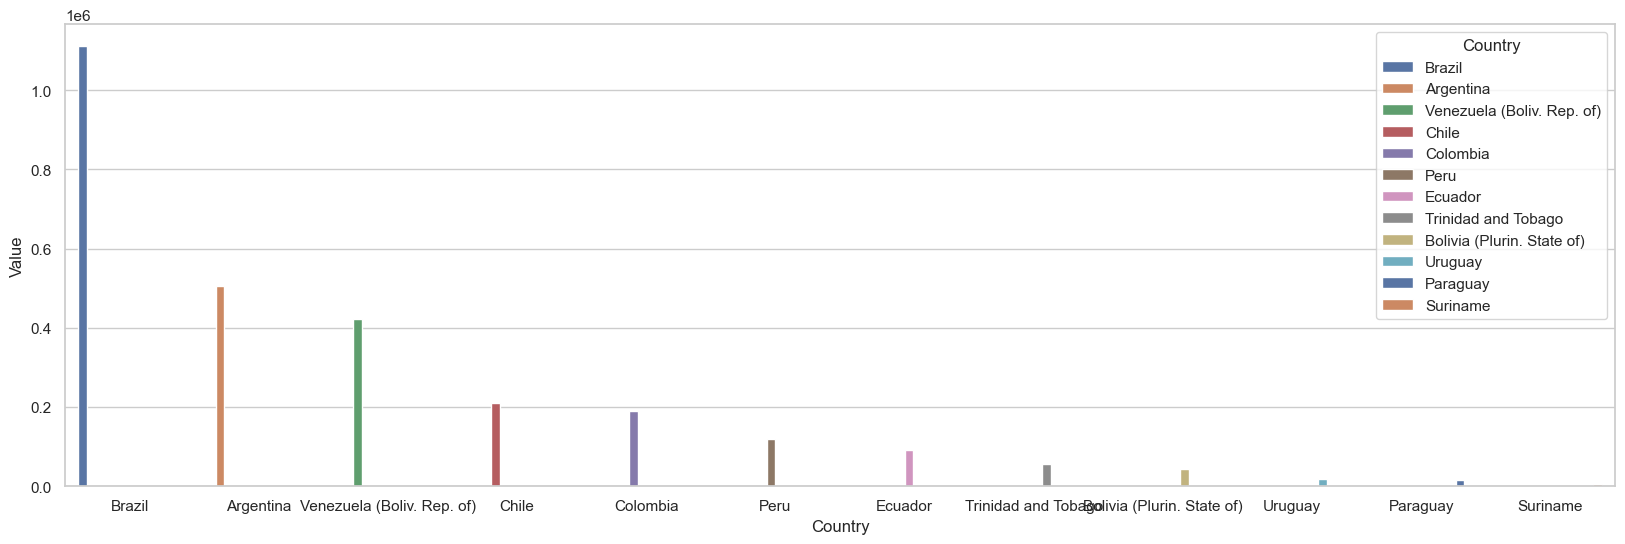

In [42]:
import seaborn as sns
plt.figure(figsize=(20, 6))
p=p.sort_values(by='Value',ascending=False)
g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=p,order=None)
datasorted.head(12)
plt.figure(figsize=(20, 6))
datasorted1=data_sum1.sort_values(by='Value',ascending=False)
g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=datasorted1,order=None)
#datasorted1.head(12)

In [39]:
import seaborn as sns
plt.figure(figsize=(20, 6))
datasorted=data_sum.sort_values(by='Value',ascending=False)
g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=datasorted,order=None)
datasorted.head(12)
plt.figure(figsize=(20, 6))
datasorted1=data_sum1.sort_values(by='Value',ascending=False)
g=sns.barplot(x='Country',y='Value',hue='Country', ci=None,palette="deep", data=datasorted1,order=None)
#datasorted1.head(12)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

<Figure size 2000x600 with 0 Axes>

I also conducted a comparison of the evolution of emissions, emissions per capita, arable land, and forest cover

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

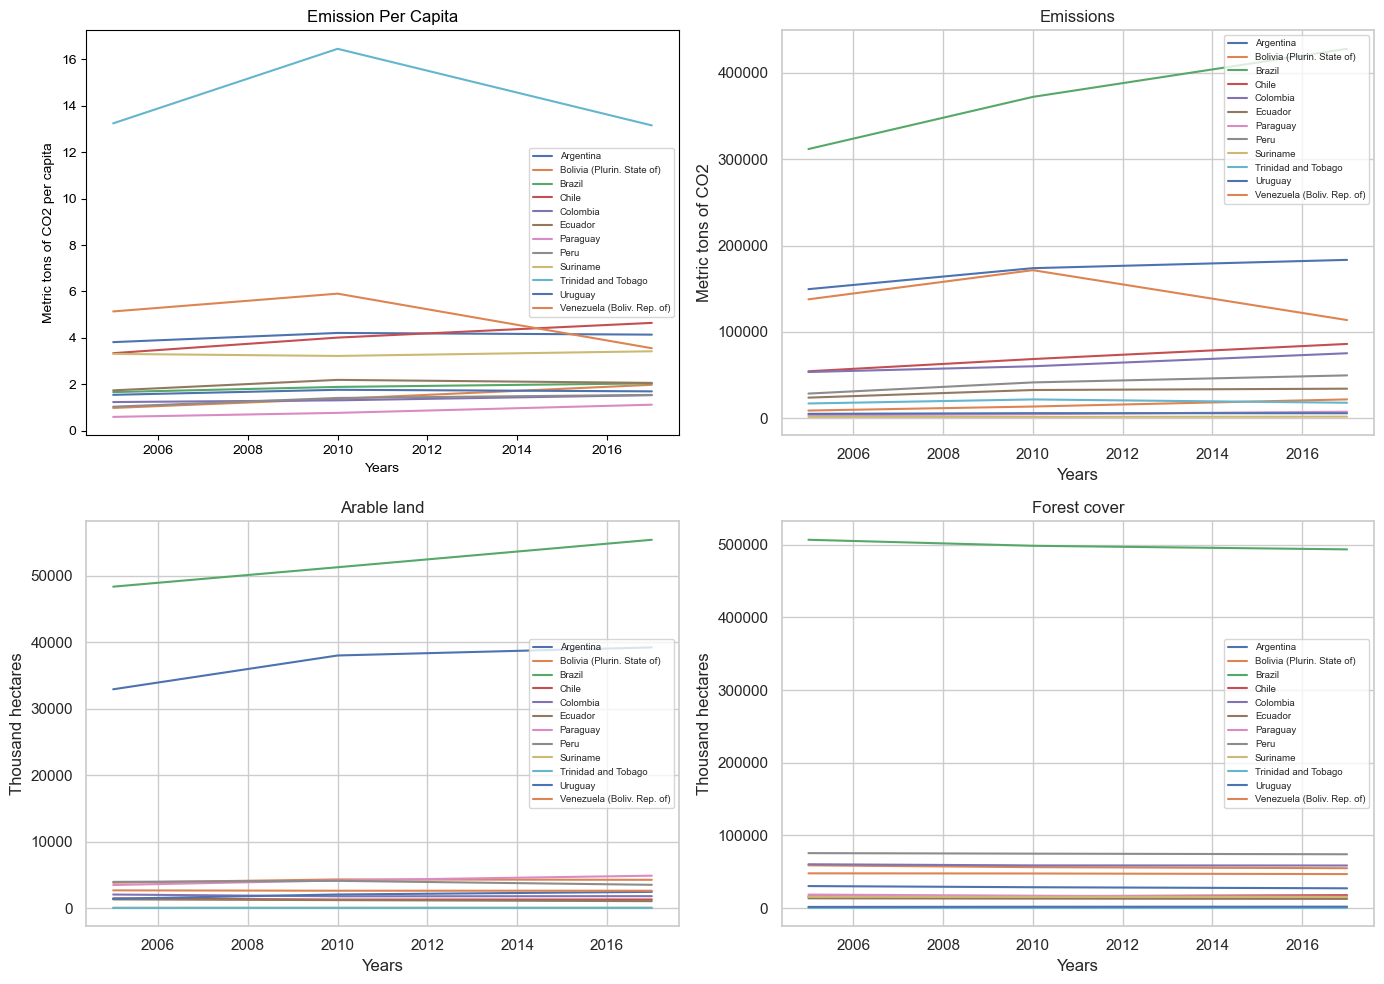

In [24]:
#Emissions per capita
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datae_a)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2 per capita")
gea.set_title("Emission Per Capita")
plt.legend(fontsize='xx-small',loc='best')#opciones: x-small,small,medium,large,x-large,etc. loc: upper right,lower left, center, etc.
#Emissions
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2,2)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datae_b)
gea.set_xlabel("Years")
gea.set_ylabel("Metric tons of CO2")
gea.set_title("Emissions")
plt.legend(fontsize='xx-small',loc='best')
#Arable land
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datal_d)
gea.set_xlabel("Years")
gea.set_ylabel("Thousand hectares")
gea.set_title("Arable land")
plt.legend(fontsize='xx-small',loc='best')
#Forest cover
#plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 4)
sns.set_theme(style="whitegrid")
gea=sns.lineplot(x='Year',y='Value',hue='Country',palette="deep",data=datal_c)
gea.set_xlabel("Years")
gea.set_ylabel("Thousand hectares")
gea.set_title("Forest cover")
plt.legend(fontsize='xx-small',loc='best')
plt.tight_layout()
plt.show()

# POWERBI DASHBOARD


In [25]:
from IPython.display import HTML

# Código HTML del Dashboard de Power BI
html_code_powerbi_dashboard = """
<iframe title="Landandemissionsdashboard" width="1500" height="1000" src="https://app.powerbi.com/view?r=eyJrIjoiODc2ODkzNzgtMzdiYS00Y2ZjLTk4ZmQtZWQ4ZWFjMTIyNDY5IiwidCI6IjUwNjQwNTg0LTJhNDAtNDIxNi1hODRiLTliM2VlMGYzZjZjZiIsImMiOjR9" frameborder="0" allowFullScreen="true"></iframe>
"""

# Mostrar el Dashboard dentro del notebook
display(HTML(html_code_powerbi_dashboard))

# Final Conclusions

En la gran mayoria de paises, exceptuando Cololmbia y ecuador, la tendencia entre la disminucion de cobertura forestal y el aumento de tierra cultivable, asi como de la cantidad de emisiones generada es clara, a medida que la cobertura forestal se ha venido disminuyendo a traves de los años asi mismo ha aumentado la cobertura forestal.Sin embargo, debido a la poca cantidad de datos disponibles en ambos datasets no se puede inferir de sobre manera si esta es la unica razon por la que esto ha pasado. 
